<a href="https://colab.research.google.com/github/hyewonleess/MiraeAssetContest/blob/master/FeatureEngineering_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 한글 폰트 설정
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='NanumBarunGothic')

In [ ]:
train=pd.read_csv('train.csv',header=0, encoding='utf-8')
train.head()

,ID,nur_hosp_yn,ac_ctr_diff,hsp_avg_optt_bilg_isamt_s,hsp_avg_surop_bilg_isamt_s,ar_rclss_cd,fds_cust_yn,hspz_dys_s,inamt_nvcd,hsp_avg_diag_bilg_isamt_s,blrs_cd,dsas_ltwt_gcd,dsas_avg_diag_bilg_isamt_s,dsas_acd_rst_dcd,base_ym,kcd_gcd,hsp_avg_hspz_bilg_isamt_s,optt_blcnt_s,mtad_cntr_yn,heltp_pf_ntyn,prm_nvcd,surop_blcnt_s,mdct_inu_rclss_dcd,dsas_avg_optt_bilg_isamt_s,isrd_age_dcd,hspz_blcnt_s,dsas_avg_surop_bilg_isamt_s,urlb_fc_yn,dsas_avg_hspz_bilg_isamt_s,smrtg_5y_passed_yn,ac_rst_diff,bilg_isamt_s,optt_nbtm_s,target
0,0,0,6,0.1303,0.0000,1,0,0.3452,4,0.0000,12,1,0.9793,1,201901,3,1.6021,2.0,0,0,1,0.0,2,1.2002,3,10.0000,1.1701,0,1.2612,0,0,0.4240,0.8571,1
1,1,1,6,0.0000,0.5770,4,0,0.0000,4,0.0000,2,3,0.0000,22,201901,8,0.0000,0.0,0,0,1,1.0,1,0.0000,4,0.0000,0.1508,0,0.0023,0,0,0.8602,0.0000,0
2,2,1,6,0.0000,0.2885,1,1,0.0000,6,0.0000,2,3,0.0000,22,201901,8,0.0000,0.0,0,0,1,1.0,1,0.0000,4,0.0000,0.1508,0,0.0023,0,0,0.4301,0.0000,1
3,3,0,4,0.0197,0.0680,2,0,0.8056,6,0.0587,8,3,0.0000,23,201901,8,0.5638,0.0,0,0,1,0.0,2,0.0000,9,1.4444,0.0863,0,0.1920,0,0,0.2509,0.0000,1
4,4,0,5,0.0000,0.0000,9,0,0.4167,2,0.0000,8,3,0.0000,23,201901,8,0.4464,0.0,0,0,2,0.0,2,0.0000,0,1.3333,0.0863,0,0.1920,0,0,0.0323,0.0000,1


In [ ]:
variable = ['ID','base_ym','dsas_ltwt_gcd','kcd_gcd','dsas_acd_rst_dcd','ar_rclss_cd','blrs_cd','mdct_inu_rclss_dcd','nur_hosp_yn','optt_nbtm_s','bilg_isamt_s','hspz_dys_s','hsp_avg_hspz_bilg_isamt_s','hsp_avg_optt_bilg_isamt_s',
            'hsp_avg_surop_bilg_isamt_s','hsp_avg_diag_bilg_isamt_s','dsas_avg_hspz_bilg_isamt_s','dsas_avg_optt_bilg_isamt_s','dsas_avg_surop_bilg_isamt_s','dsas_avg_diag_bilg_isamt_s','hspz_blcnt_s','surop_blcnt_s','optt_blcnt_s',
            'isrd_age_dcd','fds_cust_yn','smrtg_5y_passed_yn','mtad_cntr_yn','heltp_pf_ntyn','prm_nvcd','inamt_nvcd','ac_ctr_diff','ac_rst_diff','urlb_fc_yn','target']
variable_kor = ['접수일련번호','접수년월','질병경중등급코드','KCD등급코드','질병구분코드','발생지역구분코드','치료행위코드','의료기관구분코드','요양병원여부','통원횟수','청구보험금','입원일수','병원별평균입원청구보험금',
                '병원별평균통원청구보험금','병원별평균수술청구보험금','병원별평균진단청구보험금','질병별평균입원청구보험금','질병별평균통원청구보험금','질병별평균수술청구보험금','질병별평균진단청구보험금','입원청구건수',
                '수술청구건수','통원청구건수','고객나이구분코드','보험사기이력고객여부','부담보5년경과여부','중도부가계약여부','건강인우대계약여부','보험료구간코드','가입금액구간코드','청구일계약일간기간구분코드',
                '청구일부활일간기간구분코드','부실판매자계약여부','실사상태코드']

In [ ]:
train = train[variable]
df = train.copy()
df.columns = variable_kor
df.head()

,접수일련번호,접수년월,질병경중등급코드,KCD등급코드,질병구분코드,발생지역구분코드,치료행위코드,의료기관구분코드,요양병원여부,통원횟수,청구보험금,입원일수,병원별평균입원청구보험금,병원별평균통원청구보험금,병원별평균수술청구보험금,병원별평균진단청구보험금,질병별평균입원청구보험금,질병별평균통원청구보험금,질병별평균수술청구보험금,질병별평균진단청구보험금,입원청구건수,수술청구건수,통원청구건수,고객나이구분코드,보험사기이력고객여부,부담보5년경과여부,중도부가계약여부,건강인우대계약여부,보험료구간코드,가입금액구간코드,청구일계약일간기간구분코드,청구일부활일간기간구분코드,부실판매자계약여부,실사상태코드
0,0,201901,1,3,1,1,12,2,0,0.8571,0.4240,0.3452,1.6021,0.1303,0.0000,0.0000,1.2612,1.2002,1.1701,0.9793,10.0000,0.0,2.0,3,0,0,0,0,1,4,6,0,0,1
1,1,201901,3,8,22,4,2,1,1,0.0000,0.8602,0.0000,0.0000,0.0000,0.5770,0.0000,0.0023,0.0000,0.1508,0.0000,0.0000,1.0,0.0,4,0,0,0,0,1,4,6,0,0,0
2,2,201901,3,8,22,1,2,1,1,0.0000,0.4301,0.0000,0.0000,0.0000,0.2885,0.0000,0.0023,0.0000,0.1508,0.0000,0.0000,1.0,0.0,4,1,0,0,0,1,6,6,0,0,1
3,3,201901,3,8,23,2,8,2,0,0.0000,0.2509,0.8056,0.5638,0.0197,0.0680,0.0587,0.1920,0.0000,0.0863,0.0000,1.4444,0.0,0.0,9,0,0,0,0,1,6,4,0,0,1
4,4,201901,3,8,23,9,8,2,0,0.0000,0.0323,0.4167,0.4464,0.0000,0.0000,0.0000,0.1920,0.0000,0.0863,0.0000,1.3333,0.0,0.0,0,0,0,0,0,2,2,5,0,0,1


In [ ]:
df.isnull().sum()

접수일련번호           0
접수년월             0
질병경중등급코드         0
KCD등급코드          0
질병구분코드           0
발생지역구분코드         0
치료행위코드           0
의료기관구분코드         0
요양병원여부           0
통원횟수             0
청구보험금            0
입원일수             0
병원별평균입원청구보험금     0
병원별평균통원청구보험금     0
병원별평균수술청구보험금     0
병원별평균진단청구보험금     0
질병별평균입원청구보험금     0
질병별평균통원청구보험금     0
질병별평균수술청구보험금     0
질병별평균진단청구보험금     0
입원청구건수           0
수술청구건수           0
통원청구건수           0
고객나이구분코드         0
보험사기이력고객여부       0
부담보5년경과여부        0
중도부가계약여부         0
건강인우대계약여부        0
보험료구간코드          0
가입금액구간코드         0
청구일계약일간기간구분코드    0
청구일부활일간기간구분코드    0
부실판매자계약여부        0
실사상태코드           0
dtype: int64

## 1. Feature 선택

+ 제거할 변수: `접수일련번호`, `접수년월`, `발생지역구분코드`

In [ ]:
id_=['접수일련번호','접수년월','실사상태코드'] 

# 고객정보
customer_order='고객나이구분코드' # 체크
customer_bool='보험사기이력고객여부' 
# 상품정보
products_bool=['부담보5년경과여부','중도부가계약여부','건강인우대계약여부']
products_order=['보험료구간코드','가입금액구간코드','청구일계약일간기간구분코드','청구일부활일간기간구분코드']
# 판매자정보
seller='부실판매자계약여부'
# 질병정보
disease_bool='요양병원여부'
disease_order=['질병경중등급코드','KCD등급코드','질병구분코드','발생지역구분코드','치료행위코드','의료기관구분코드']
disease_conti=[x for x in df.columns if (x.endswith('보험금') or x.endswith('수'))]

### (1) `보험료구간코드`, `가입금액구간코드` 
+ Unknown variable 특징: target 분포가 다른 카테고리와 양상이 많이 다름 - 조사(2) 의 비율이 가장 높음

In [ ]:
# 보험료구간코드 99인 데이터를 제거하면 두 변수의 상관관계가 낮아진다.
df.loc[df['보험료구간코드']!=99,['보험료구간코드','가입금액구간코드']].corr()

,보험료구간코드,가입금액구간코드
보험료구간코드,1.000000,0.152574
가입금액구간코드,0.152574,1.000000


In [ ]:
df_99=df[df['보험료구간코드']==99]
df_99.shape

(34436, 34)

 + `고객나이구분코드` 에서 문제가 되는 카테고리 7, 9 중 7을 df_99 가 거의 대부분 차지했다 --> `고객나이구분코드` 7 이 Unknown 값이라고 예상됨

Text(0.5, 1.0, '보험료구간코드 99 데이터 vs 원본데이터 고객연령대분포')

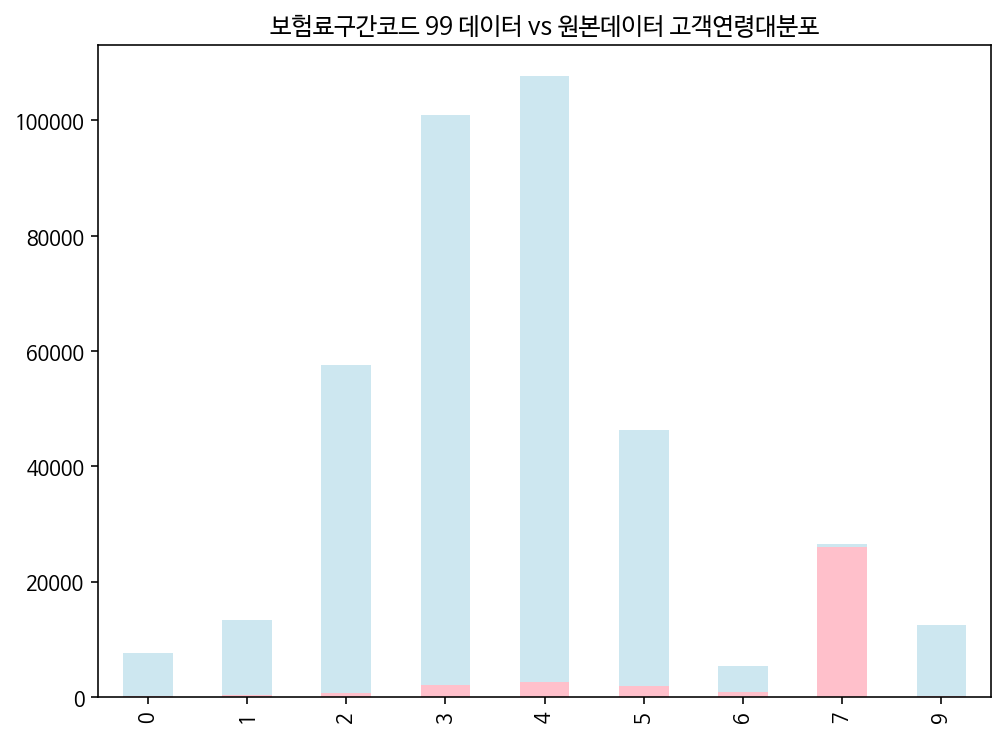

In [ ]:
df[customer_order].value_counts().sort_index().plot.bar(color='lightblue',figsize=(8,6),alpha=0.6)
df_99[customer_order].value_counts().sort_index().plot.bar(color='pink',figsize=(8,6))
plt.title('보험료구간코드 99 데이터 vs 원본데이터 고객연령대분포')

In [ ]:
# 타겟별 변수 count stacking 함수
def bar_stack_target(df,x_var):
  group=df.groupby([x_var,'실사상태코드'])['부실판매자계약여부'].count()
  group=group/group.groupby(level=0).sum()
  group=group.reset_index().rename(columns={'부실판매자계약여부':'비율'})

  sns.barplot(data=group,x=x_var,y='비율',hue='실사상태코드',palette='coolwarm')
  plt.title(f'{x_var}별 실사상태코드 분포',fontsize=15); plt.ylabel('비율(%)')
  plt.show()

#### df_99 vs df (original data)

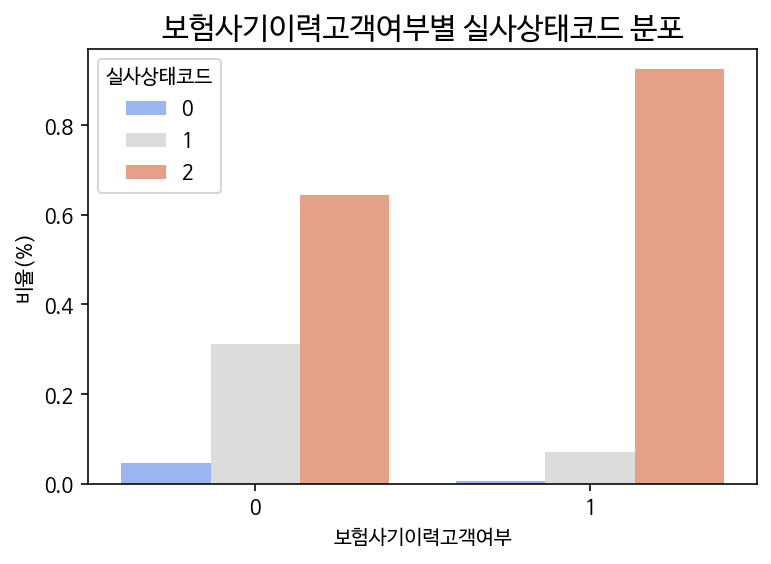

In [ ]:
bar_stack_target(df_99,'보험사기이력고객여부')

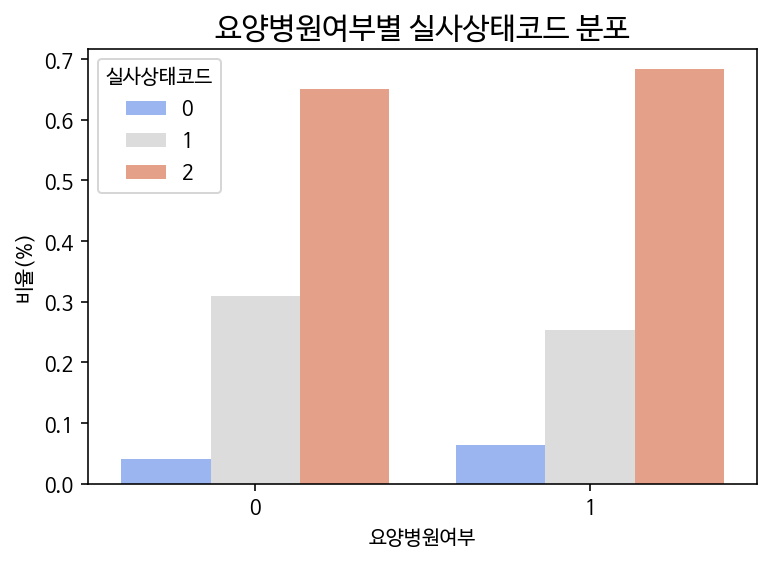

In [ ]:
bar_stack_target(df_99,'요양병원여부')

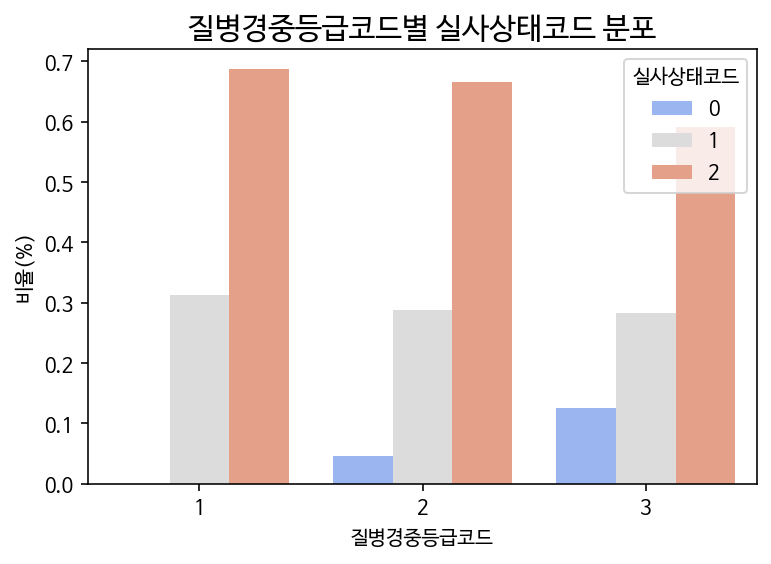

In [ ]:
bar_stack_target(df_99,'질병경중등급코드')

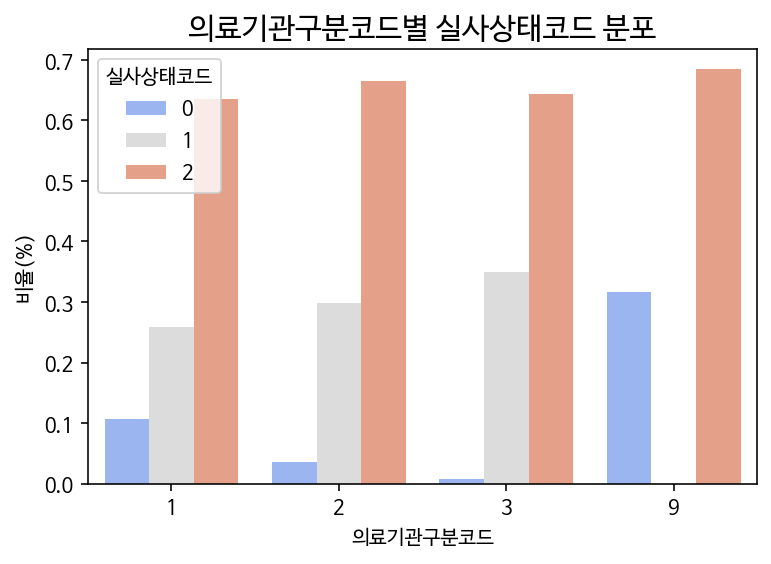

In [ ]:
bar_stack_target(df_99,'의료기관구분코드')

**결론** <br>
+ `보험료구간코드` 99 (Unkown) 데이터는 전체 데이터의 9%나 차지하기 때문에 제거는 하지 않는다. 
+ 이 데이터들의 target 분포 양상이 Original data 와 매우 다르기때문에(조사(2)의 비율이 대체로 높음), 다른 카테고리 데이터 (보험료구간코드 0,1,2,3,4,..) 와 결합하는 것은 적절하지 않은 것 같다.
+ Solution) 새로운 변수 만들기 - 새로운 카테고리형 변수를 생성하여 보험료구간코드가 99이면 1, 아니면 0으로 표시

### (2) `고객나이구분코드`
+ 카테고리 7: Unkown 데이터인 것으로 예상됨
+ 카테고리 9: 다른 연령대보다 자동지급(0) 의 비율이 높은 편이다. 타겟분포 양상은 카테고리 0 이나 1과 비슷

In [ ]:
df[customer_order].value_counts().sort_index()

0      7550
1     13344
2     57563
3    100922
4    107780
5     46338
6      5395
7     26577
9     12459
Name: 고객나이구분코드, dtype: int64

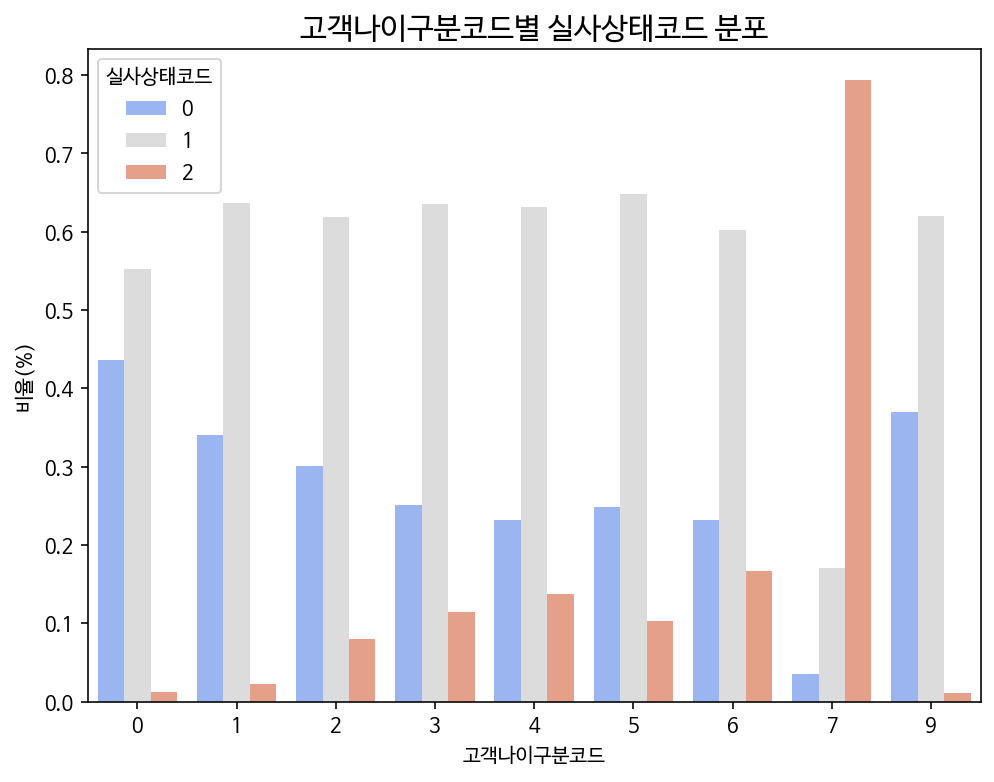

In [ ]:
plt.figure(figsize=(8,6))
bar_stack_target(df,'고객나이구분코드')

In [ ]:
df_age_9=df[df['고객나이구분코드']==9]
df_age_9.shape

(12459, 34)

#### Hierarchical Clustering - 고객나이구분코드 클러스터링

In [ ]:
data=df.drop(['접수일련번호','접수년월','발생지역구분코드'],axis=1)
data=data.groupby(['고객나이구분코드']).mean()

In [ ]:
data.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 9], dtype='int64', name='고객나이구분코드')

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
# normalize data for clustering
data_scaled=normalize(data)
data_scaled=pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head(3)

,질병경중등급코드,KCD등급코드,질병구분코드,치료행위코드,의료기관구분코드,요양병원여부,통원횟수,청구보험금,입원일수,병원별평균입원청구보험금,병원별평균통원청구보험금,병원별평균수술청구보험금,병원별평균진단청구보험금,질병별평균입원청구보험금,질병별평균통원청구보험금,질병별평균수술청구보험금,질병별평균진단청구보험금,입원청구건수,수술청구건수,통원청구건수,보험사기이력고객여부,부담보5년경과여부,중도부가계약여부,건강인우대계약여부,보험료구간코드,가입금액구간코드,청구일계약일간기간구분코드,청구일부활일간기간구분코드,부실판매자계약여부,실사상태코드
0,0.106930,0.432859,0.742891,0.359489,0.085290,0.002734,0.001492,0.023794,0.025752,0.034145,0.018495,0.022968,0.015118,0.014608,0.003189,0.009552,0.002573,0.033205,0.019437,0.001097,0.000436,0.000011,0.000034,0.000000,0.100712,0.207504,0.231584,0.006768,0.000315,0.024911
1,0.104214,0.361656,0.783132,0.311303,0.081544,0.006454,0.010531,0.052851,0.019262,0.034455,0.025870,0.031740,0.018742,0.017236,0.009369,0.015602,0.008127,0.029082,0.031156,0.002243,0.000320,0.000059,0.000071,0.000003,0.126536,0.246522,0.233621,0.016710,0.000422,0.028279
2,0.105987,0.353167,0.767905,0.322429,0.090450,0.009336,0.019535,0.086323,0.025916,0.045970,0.032582,0.037547,0.021219,0.023906,0.015518,0.022605,0.015028,0.034287,0.035972,0.003431,0.000361,0.000033,0.000214,0.000116,0.109102,0.244469,0.266245,0.026666,0.000294,0.036023


In [ ]:
import scipy.cluster.hierarchy as shc

**Dendrogram 해석** 
 + 카테고리 7은 우리가 Unknown variable 로 예측했듯이, dendrogram 상에서 다른 카테고리와 함께 클러스터링 되지 않았다.
 + 그리고 그 속성이 밝혀지지 않았던 카테고리 9는 dendrogram 을 보면 카테고리 0과 가장 먼저 클러스터링이 된다. -> 카테고리 9 데이터를  카테고리 0 (나이대 0s) 데이터과 결합해도 될듯? 하다

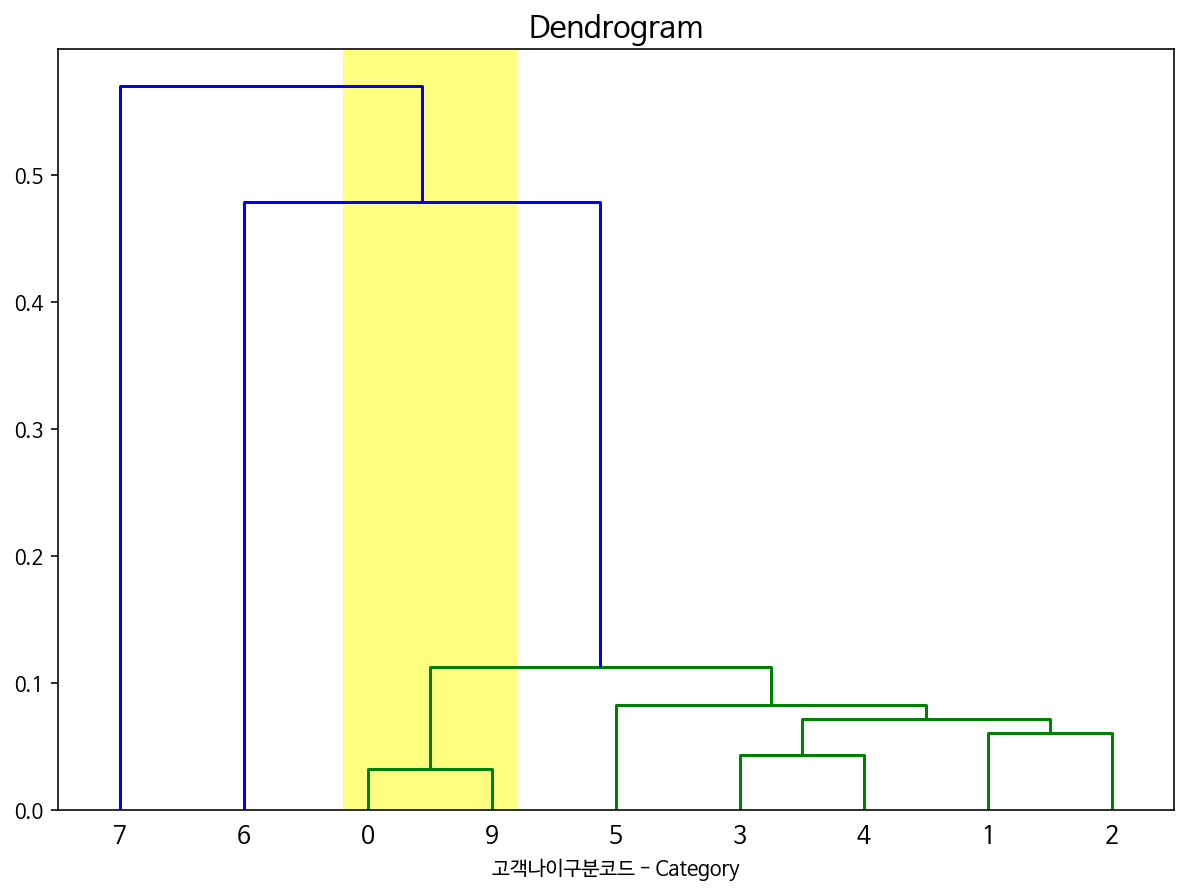

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram',fontsize=15)
dend=shc.dendrogram(shc.linkage(data_scaled,method='single'), labels=[0,1,2,3,4,5,6,7,9])
plt.xlabel('고객나이구분코드 - Category')
plt.axvspan(23,37, facecolor='yellow', alpha=0.5)

### (3) `질병구분코드` & `KCD등급코드`

In [ ]:
disease_group=df.groupby(['질병구분코드','KCD등급코드'])['접수년월'].count()
disease_group=disease_group/disease_group.groupby(level=0).sum()
disease_group=disease_group.reset_index().rename(columns={'접수년월':'비율'})
disease_group

,질병구분코드,KCD등급코드,비율
0,1,2,0.000112
1,1,3,0.999427
2,1,4,0.000460
3,2,2,0.000404
4,2,3,0.136835
...,...,...,...
199,27,9,0.000047
200,27,11,0.000047
201,27,13,0.000047
202,27,14,0.999244


In [ ]:
# 기준: 각 그룹에서 70% 이상 차지
disease_group[disease_group['비율']>0.7]

,질병구분코드,KCD등급코드,비율
1,1,3,0.999427
5,2,4,0.853603
10,3,4,0.892553
27,5,9,0.993238
34,6,9,0.989145
37,7,2,0.780245
54,8,11,0.903692
66,9,14,0.927506
67,10,5,0.912565
80,11,10,0.997077


**결론**
 + `질병경중등급코드` 와 `질병구분코드` 상관관계가 높음 --> 둘 중 하나 제거?
 + `질병구분코드` 와 `KCD등급코드`를 그룹화하고 각 질병구분코드 그룹에서 가장 차지하는 비율이 높은 KCD등급코드를 뽑았을 때, 대체로 잘 분류된 것을 확인할 수 있다. --> 이제 나머지 잘못 분류된(?) 자료들을 제거해야할지 아니면 남겨둘지 정해야할듯!

### (4) 평균청구보험금

In [ ]:
corr_mat=df[disease_order+disease_conti].corr()
upper=corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))
to_drop=[col for col in upper.columns if any(abs(upper[col])>0.6)]
to_drop

['질병구분코드',
 '병원별평균진단청구보험금',
 '질병별평균입원청구보험금',
 '질병별평균통원청구보험금',
 '질병별평균수술청구보험금',
 '질병별평균진단청구보험금']

**해석**
 + `질병경중등급코드`(or `질병구분코드`) - `질병별평균~청구보험금` 4 변수의 음의 상관관계가 매우 높다.
  

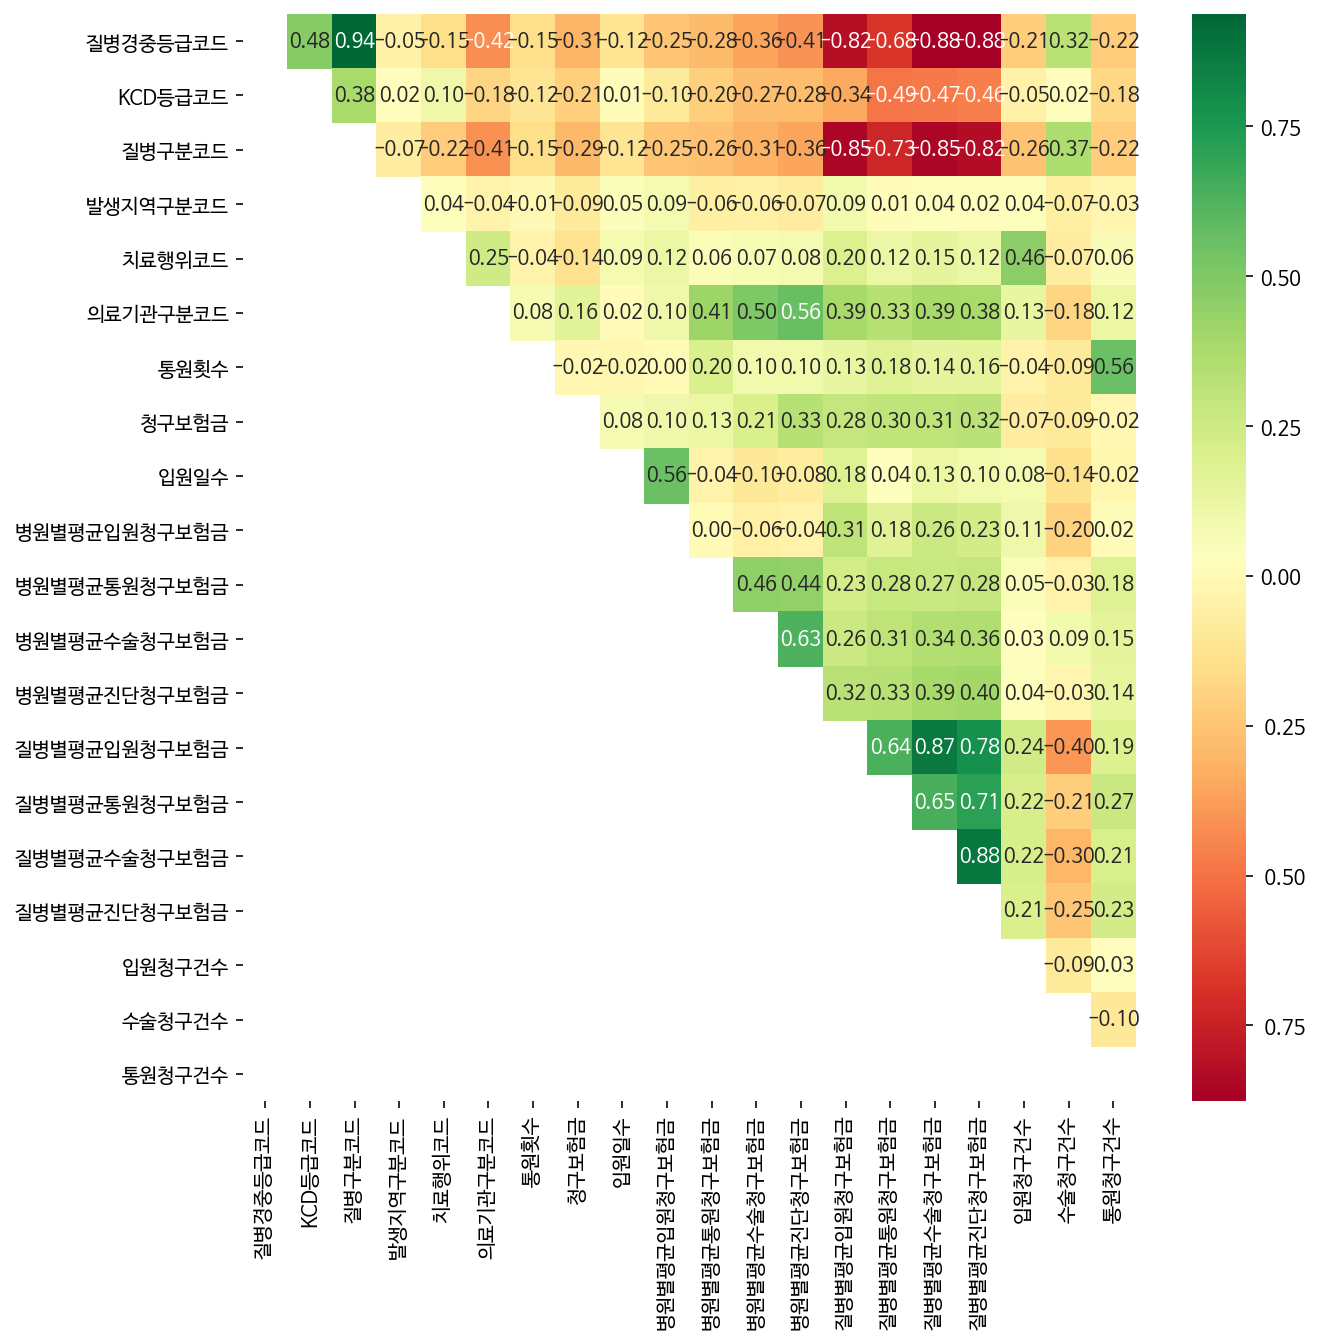

In [ ]:
mask=np.zeros_like(corr_mat, dtype=np.bool)
mask[np.tril_indices_from(mask)]=True

plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, mask=mask, cmap='RdYlGn',annot=True, fmt='.2f')

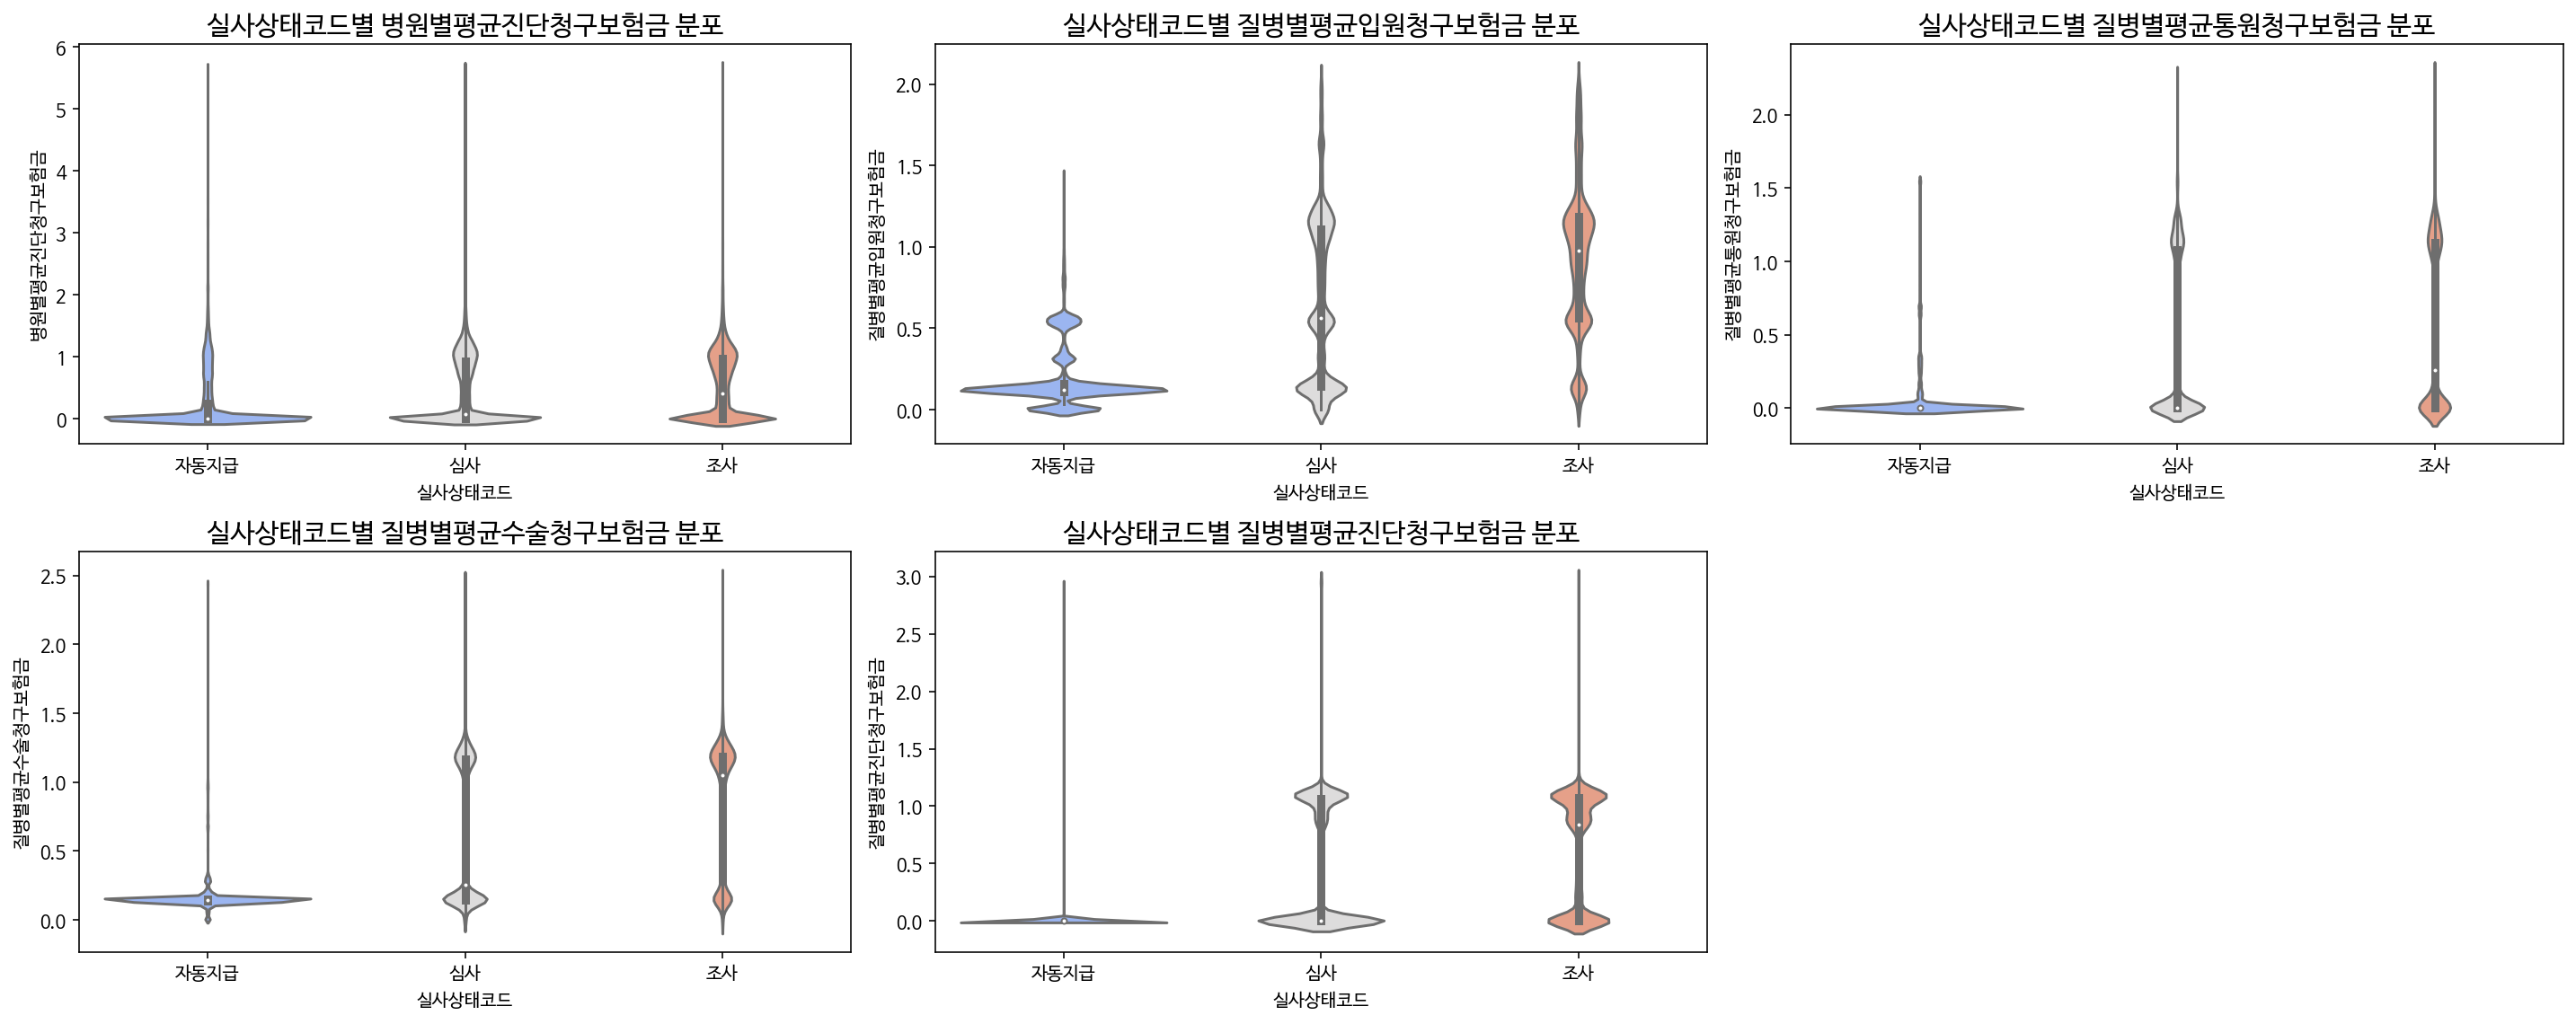

In [ ]:
plt.figure(figsize=(20,8))
for i, col in enumerate(to_drop[1:]):
  ax=plt.subplot(2,3,i+1)
  sns.violinplot(data=df, x='실사상태코드', y=col, palette='coolwarm', ax=ax)
  plt.title(f'실사상태코드별 {col} 분포',fontsize=15); plt.xticks([0,1,2],['자동지급','심사','조사'])
plt.tight_layout()
plt.show()

## 2. Feature Engineering

In [ ]:
# 1. 필요없는 column: 접수번호, 접수년월, 발생지역구분코드 제거
df.drop(['접수일련번호','접수년월','발생지역구분코드'],axis=1,inplace=True)
df.shape

(377928, 31)

In [ ]:
# 2. corrleation 높은 변수 제거(+질병구분코드, 병원별평균진단청구보험금, 질병별~보험금 4개)
df.drop(to_drop,axis=1,inplace=True)
df.shape

(377928, 25)

In [ ]:
# 3. 보험료구간코드, 가입금액구간코드 Unkown variable 처리 (고객나이구분코드 7도 어느정도 처리됨) - 수정필요!
def get_99_col(df,col):
  data99=[]
  for value in df[col].values:
    if value==99:
      data99.append(1)
    else:
      data99.append(0)
  return data99

In [ ]:
df['보험료구간99여부']=get_99_col(df,'보험료구간코드')

In [ ]:
# 4. 의료기관 Unkown data 제거
df=df[df['의료기관구분코드']!=9]

In [ ]:
# 5. 고객나이구분코드 9 -> 0 바꾸기 (위에 hierarchical clustering 참고)
df['고객나이구분코드'].replace(9,0,inplace=True)
df['고객나이구분코드'].value_counts()

4    107720
3    100879
2     57535
5     46305
7     26556
0     20008
1     13338
6      5394
Name: 고객나이구분코드, dtype: int64

**논의 필요**

In [ ]:
# 6. 치료행위코드- '질병 진단' 이라는 항목이 포함되면 타겟에서 조사(2)의 비율이 높게 나타나는 것을 확인했었음
df['질병진단여부']=0
df.loc[df['치료행위코드'].isin([1,3,5,7,9,11,13,15]),'질병진단여부']=1 
df.head()

,질병경중등급코드,KCD등급코드,치료행위코드,의료기관구분코드,요양병원여부,통원횟수,청구보험금,입원일수,병원별평균입원청구보험금,병원별평균통원청구보험금,병원별평균수술청구보험금,입원청구건수,수술청구건수,통원청구건수,고객나이구분코드,보험사기이력고객여부,부담보5년경과여부,중도부가계약여부,건강인우대계약여부,보험료구간코드,가입금액구간코드,청구일계약일간기간구분코드,청구일부활일간기간구분코드,부실판매자계약여부,실사상태코드,보험료구간99여부,질병진단여부
0,1,3,12,2,0,0.8571,0.4240,0.3452,1.6021,0.1303,0.0000,10.0000,0.0,2.0,3,0,0,0,0,1,4,6,0,0,1,0,0
1,3,8,2,1,1,0.0000,0.8602,0.0000,0.0000,0.0000,0.5770,0.0000,1.0,0.0,4,0,0,0,0,1,4,6,0,0,0,0,0
2,3,8,2,1,1,0.0000,0.4301,0.0000,0.0000,0.0000,0.2885,0.0000,1.0,0.0,4,1,0,0,0,1,6,6,0,0,1,0,0
3,3,8,8,2,0,0.0000,0.2509,0.8056,0.5638,0.0197,0.0680,1.4444,0.0,0.0,0,0,0,0,0,1,6,4,0,0,1,0,0
4,3,8,8,2,0,0.0000,0.0323,0.4167,0.4464,0.0000,0.0000,1.3333,0.0,0.0,0,0,0,0,0,2,2,5,0,0,1,0,0


**실사상태코드에 부정적인 영향을 주는 변수 생성 - Yes/No 변수 활용** <br>
EDA 결과 - `보험료구간99여부`, `질병진단여부`, `보험사기이력고객여부` 가 실사상태코드를 주로 조사(2) 로 분류하는데, 이를 활용하여 부정적인 점수를 부여하는 feature를 생성한다.
+ 범위 0~3: 점수가 높을수록 2로 분류되는 경향 높음

In [ ]:
df['부정점수']=df['보험료구간99여부']+df['질병진단여부']+df['보험사기이력고객여부']

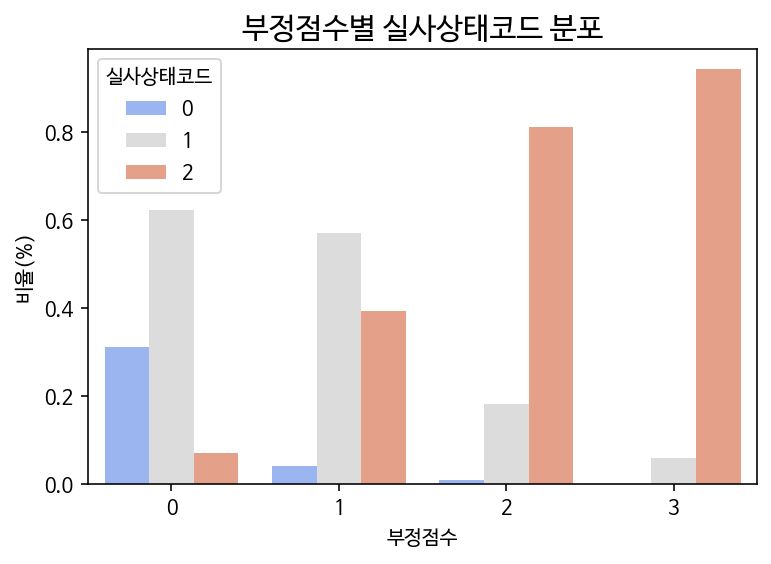

In [ ]:
bar_stack_target(df,'부정점수')